In [1]:
#importing necessary libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab import files


In [2]:
uploaded = files.upload()

Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility.xlsx
Saving PCOS_infertility.csv to PCOS_infertility.csv


In [3]:
file_path_with_infertility = "PCOS_infertility.csv"
file_path_without_infertility = "PCOS_data_without_infertility.xlsx"

In [4]:
PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_withoutinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

In [5]:
#Using pd.merge to merge two dats
data = pd.merge(PCOS_withoutinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)


data.head()


<ipython-input-5-63cb2a138d7a>:2: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data = pd.merge(PCOS_withoutinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [8]:
# Convert string-based numeric columns to numeric values
#dataframe.apply(pd.to_numeric) (for dataframe)
#pd.to_numeric function is designed to work with Series
numeric_columns = ["AMH(ng/mL)", "II beta-HCG(mIU/mL)"]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')


# Handling missing values
median_values = data.median()  # Calculate median values for all columns

# Fill missing values with the median of each respective feature
data.fillna(median_values, inplace=True)




KeyError: "['II beta-HCG(mIU/mL)'] not in index"

In [ ]:
data.describe()

In [9]:
# Correlation is a statistical measure that describes the extent to which two variables change together.
# It ranges from -1 to 1, where:
#   1 indicates a perfect positive correlation (both variables increase or decrease together).
#  -1 indicates a perfect negative correlation (one variable increases as the other decreases).
#   0 indicates no correlation.

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Subset the DataFrame with numeric columns
subset_data = data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Print or display the correlation matrix
print(correlation_matrix)


                          Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  \
Sl. No                  1.000000          1.000000    0.060998    0.067133   
Patient File No.        1.000000          1.000000    0.060998    0.067133   
PCOS (Y/N)              0.060998          0.060998    1.000000   -0.168513   
 Age (yrs)              0.067133          0.067133   -0.168513    1.000000   
Weight (Kg)            -0.082823         -0.082823    0.211938   -0.029734   
Height(Cm)             -0.011700         -0.011700    0.068254   -0.119819   
BMI                    -0.083578         -0.083578    0.199534    0.021261   
Blood Group             0.001705          0.001705    0.036433   -0.010954   
Pulse rate(bpm)        -0.044533         -0.044533    0.091821    0.045831   
RR (breaths/min)       -0.015196         -0.015196    0.036928    0.087382   
Hb(g/dl)               -0.088681         -0.088681    0.087170   -0.021558   
Cycle(R/I)             -0.022959         -0.022959    0.401644  

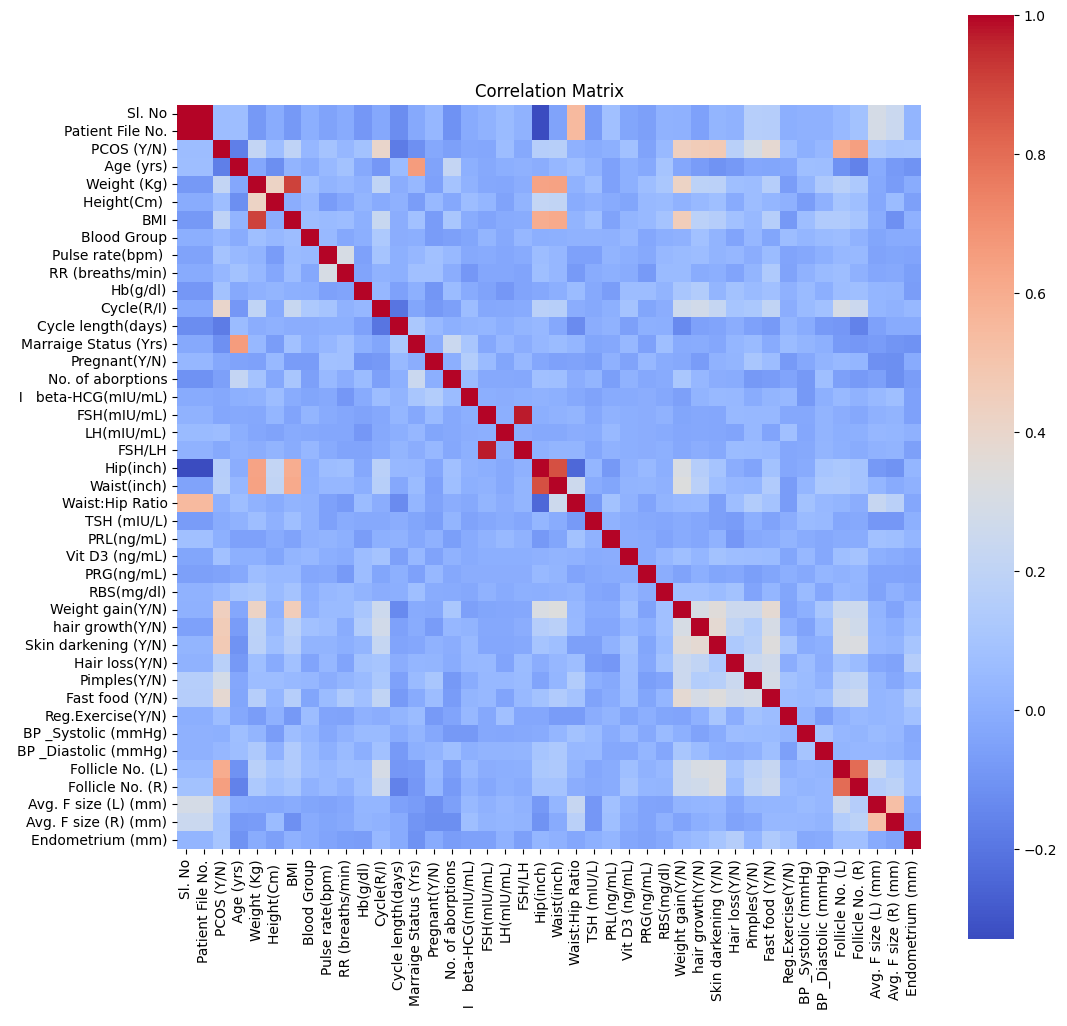

In [10]:

# adjust the figsize to your desired width and height
plt.figure(figsize=(12, 12))
# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, cmap="coolwarm", square=True)
# Set title
plt.title("Correlation Matrix")

# Show the plot
plt.show()



Mean: 4.9408502772643255
Median: 5.0
Standard Deviation:1.4920202615497296


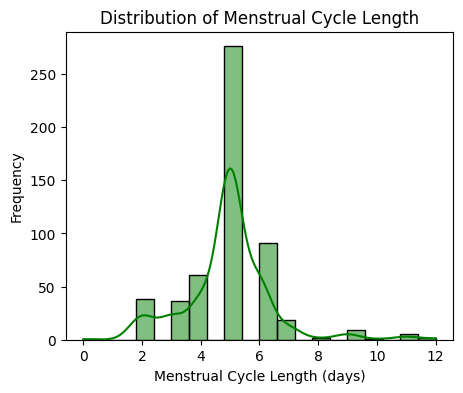

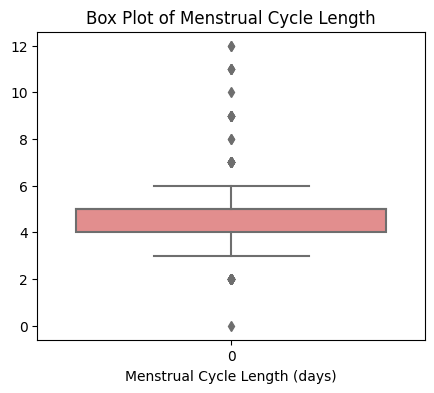

In [11]:


# Descriptive Statistics
print(f"Mean: {data['Cycle length(days)'].mean()}")
print(f"Median: {data['Cycle length(days)'].median()}")
print(f"Standard Deviation:{data['Cycle length(days)'].std()}")

# Visualization - Histogram
plt.figure(figsize=(5, 4))
sns.histplot(data['Cycle length(days)'], bins=20, kde=True, color='green')
plt.title("Distribution of Menstrual Cycle Length")
plt.xlabel("Menstrual Cycle Length (days)")
plt.ylabel("Frequency")
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(5, 4))
sns.boxplot(data['Cycle length(days)'], color='lightcoral')
plt.title("Box Plot of Menstrual Cycle Length")
plt.xlabel("Menstrual Cycle Length (days)")
plt.show()


In [12]:
mean_bmi = data['BMI'].mean()
median_bmi = data['BMI'].median()
std_bmi = data['BMI'].std()

print(f"Mean BMI: {mean_bmi}")
print(f"Median BMI: {median_bmi}")
print(f"Standard Deviation BMI: {std_bmi}")


Mean BMI: 24.31128466696858
Median BMI: 24.23822715
Standard Deviation BMI: 4.0563990861000665


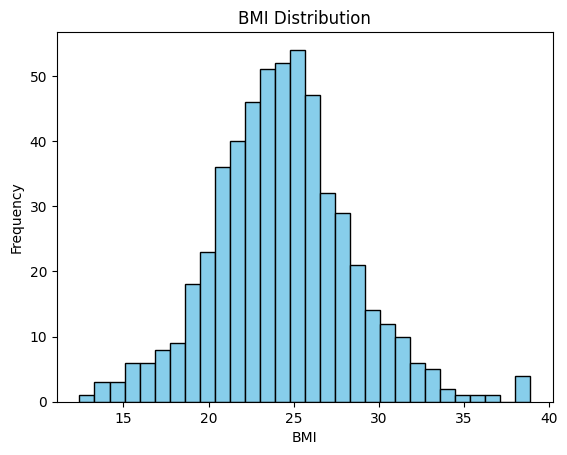

In [13]:
plt.hist(data['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


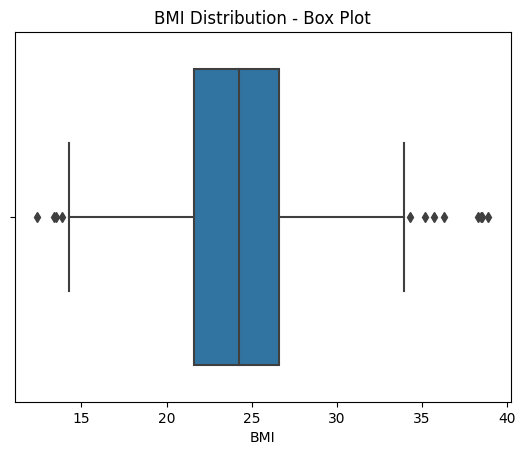

In [14]:
sns.boxplot(x=data['BMI'])
plt.title('BMI Distribution - Box Plot')
plt.xlabel('BMI')
plt.show()


In [15]:
mean_bmi = data['BMI'].mean()
median_bmi = data['BMI'].median()
std_bmi = data['BMI'].std()

print(f"Mean BMI: {mean_bmi}")
print(f"Median BMI: {median_bmi}")
print(f"Standard Deviation BMI: {std_bmi}")


Mean BMI: 24.31128466696858
Median BMI: 24.23822715
Standard Deviation BMI: 4.0563990861000665


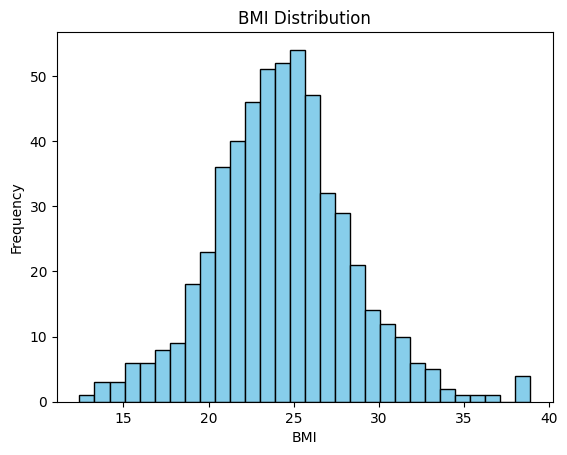

In [16]:
plt.hist(data['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


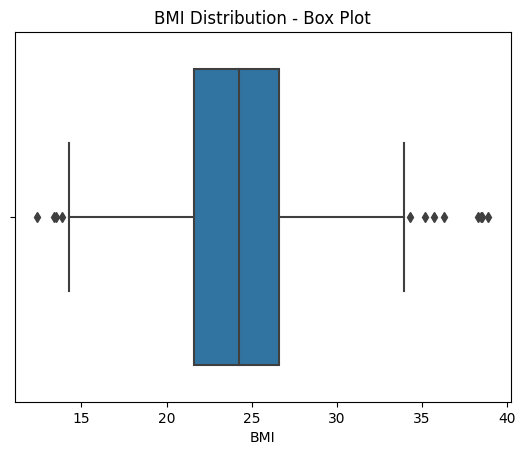

In [17]:
sns.boxplot(x=data['BMI'])
plt.title('BMI Distribution - Box Plot')
plt.xlabel('BMI')
plt.show()


In [ ]:

# Distribution of follicles in both ovaries.
sns.lmplot(data=data, x='Follicle No. (R)', y='Follicle No. (L)', hue='PCOS (Y/N)', palette='Set1')
plt.show()


In [ ]:
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette="Set1")
plt.show()

In [ ]:

# Define custom colors
color = ["Red", "Green"]



# Scatter plot with custom color palette
sns.scatterplot(data=data, x='Follicle No. (R)', y='Follicle No. (L)', hue='PCOS (Y/N)', palette=color)
plt.show()


In [ ]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

In [ ]:


features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]

for i in features:

    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.3 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()


In [ ]:
#Assiging the features (X)and target(y)

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) #droping out index from features too
y=data["PCOS (Y/N)"]

#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
#Fitting the RandomForestClassifier to the training set

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#Making prediction and checking the test set

pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

In [ ]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV

parameters = {
    'n_estimators': [100,150, 200,500,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,12],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 7)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_

In [ ]:
#Fitting the model with selected parameters

rfc1=RandomForestClassifier(**CV_rfc.best_params_)
rfc1.fit(X_train, y_train)

#Testing the Model on test set

predictions=rfc1.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)

acccuracy_final

In [ ]:
classi_report = classification_report(y_test, predictions)
print(classi_report)

In [ ]:
# cofusion matrix
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')